# Predicting Concrete Compressive Strength and Classification

Concrete plays a vital role in civil engineering, and its compressive strength is determined by a complex, nonlinear relationship with variables like age and ingredient composition. This project focuses on creating machine learning models to predict the **Concrete Compressive Strength** and to classify the **ConcreteClass** based on various concrete formulations.

## Data Source
The dataset used in this project is sourced from the [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength), originally from I-Cheng Yeh's research: 
> "Modeling of strength of high performance concrete using artificial neural networks,"  
> Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

---

## Problem 1: Regression - Predicting Concrete Compressive Strength

### Objective
Develop a machine learning model to predict the **Concrete Compressive Strength** given the quantities of input ingredients and the number of days (Age) for curing the concrete.

### Steps
1. **Data Preparation**: Ensure the data is properly formatted for scikit-learn.
2. **Feature Selection**: Identify and separate features (X) and target (y).
3. **Baseline Model**: Establish a base score for the model to measure progress.
4. **Data Validation**: Validate the data to ensure sufficient samples for both training and testing.
5. **Modeling**: Use at least **7 conventional machine learning algorithms** and **Deep Learning** (Tensorflow - Keras or Pytorch) to predict **Concrete Compressive Strength**.

---

## Problem 2: Classification - Predicting ConcreteClass

### Objective
Develop a machine learning model to classify the **ConcreteClass** for a given concrete recipe.

### Data Transformation
- Create new categorical targets based on numeric data.
- Convert the **Plasticizer** feature to text.
- Remove the **Strength** feature and replace it with the **ConcreteClass** categorical target.

### Steps
1. **Data Preparation**: Ensure the data is properly formatted for scikit-learn.
2. **Feature Selection**: Identify and separate features (X) and target (y).
3. **Baseline Model**: Establish a base score for the model to measure progress.
4. **Data Validation**: Validate the data to ensure sufficient samples for both training and testing.
5. **Modeling**: Use at least **7 conventional machine learning algorithms** and **Deep Learning** (Tensorflow - Keras or Pytorch) to predict **ConcreteClass**.

<img src= 'https://www.batchmix.co.uk/wp-content/uploads/2023/12/what-is-concrete-body.jpg'>

### Importing the necessary packages

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error 

### Importing the data

In [2]:
df = pd.read_excel('Concrete_Data.xls')

### EDA - Exploratoy Data Analysis

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### Feature Engineering

In [7]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [8]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Problem 1: Regression

+ Develop a machine learning model that can predict the Concrete Compressive Strength for a particular concrete recipe given the quantities for input ingredients and a number of days (Age) for curing the concrete.
+ Use at least 7 conventional machine learning algorithms and Deep Learning to predict Concrete Compressive Strength. 

### Data Preparation for Classification

In [9]:
x = df.drop('Strength', axis=1)
y = df['Strength']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Predicting by 7 Conventional Machine Learning Algorithms

In [11]:
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR()
}

predictions = {}
r2_scores = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    r2_scores[name] = score
    predictions[name] = pred
    print(f"{name} R2 Score: {score}")

Gradient Boosting R2 Score: 0.8808309138187448
Random Forest R2 Score: 0.8755615709356207
Decision Tree R2 Score: 0.8152451096542022
KNN R2 Score: 0.7325783511509729
Ridge R2 Score: 0.6275417727142358
Linear Regression R2 Score: 0.6275416055429022
Support Vector Regression R2 Score: 0.23202535699000448


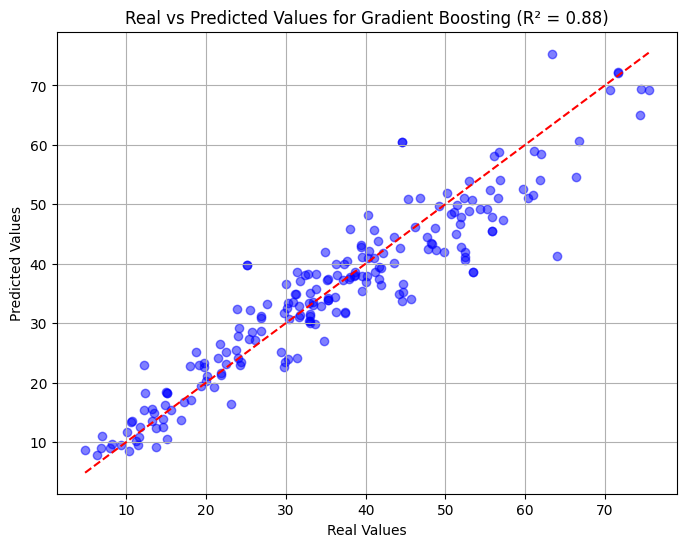

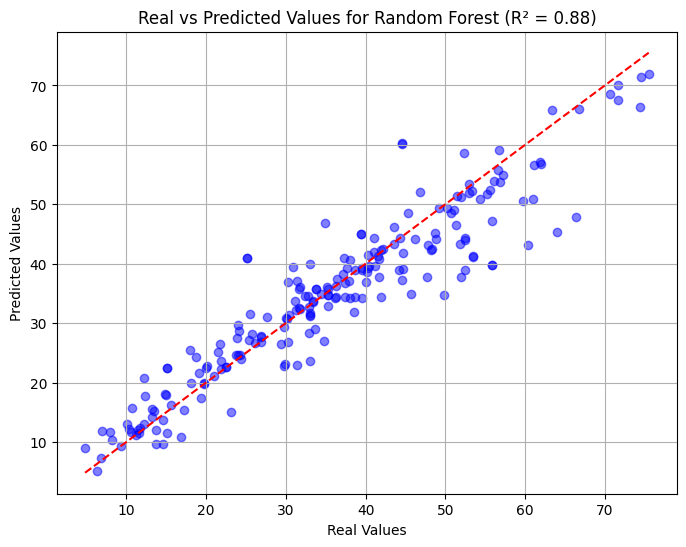

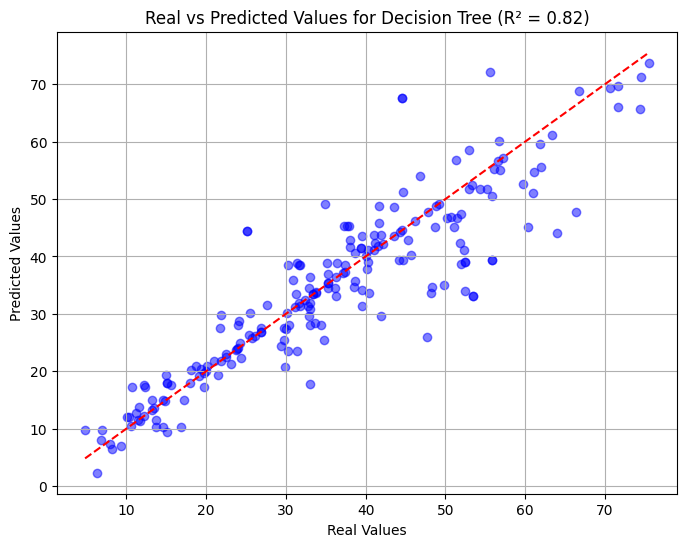

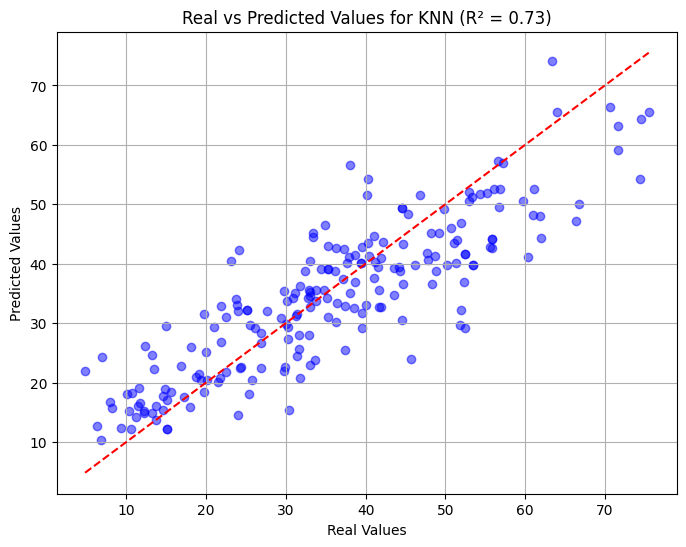

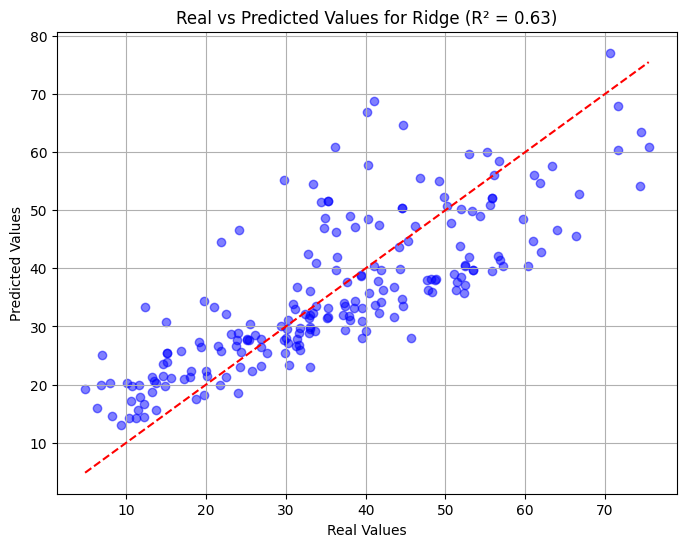

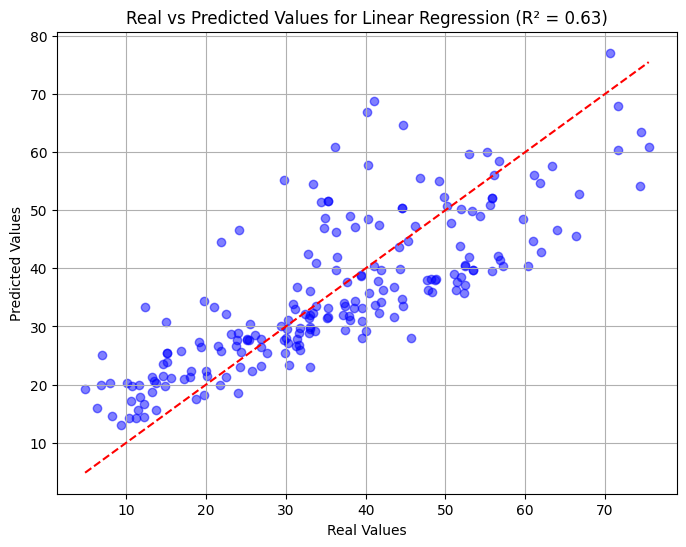

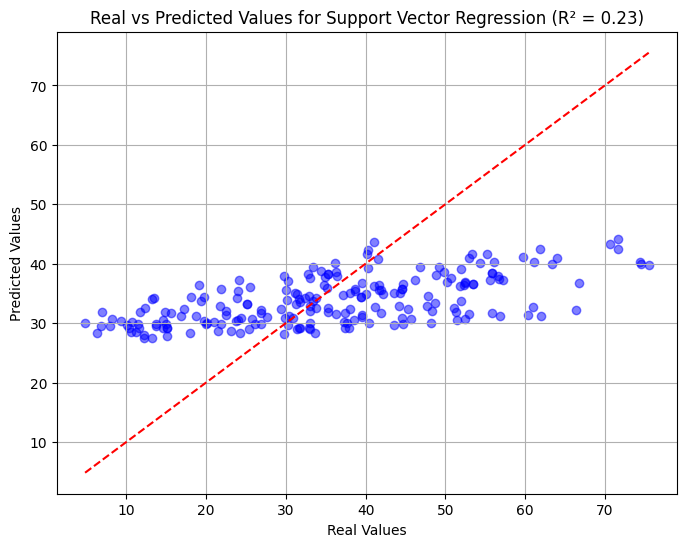

In [12]:
for name, pred in predictions.items(): #plot real vs predicted values for each model
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Real vs Predicted Values for {name} (R² = {r2_scores[name]:.2f})')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

### Deep Learning Regression Model

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(450, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(400, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(250, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history= model.fit(x_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1419.3665 - val_loss: 161.5563
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169.4690 - val_loss: 280.5414
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 201.1551 - val_loss: 111.7131
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.6020 - val_loss: 97.7152
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.4893 - val_loss: 86.2632
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88.4499 - val_loss: 93.0640
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.0340 - val_loss: 72.6173
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.5687 - val_loss: 69.3074
Epoch 9/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.9648 - val_loss: 72.6616
Epoch 10/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75.4994 - val_loss: 61.3529
Epoch 11/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.2800 - val_loss: 73.1817
Epoch 12/300
21/21 ━━━━━━━━━━━━━

In [14]:
pred = model.predict(x_test)
r2 = r2_score(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


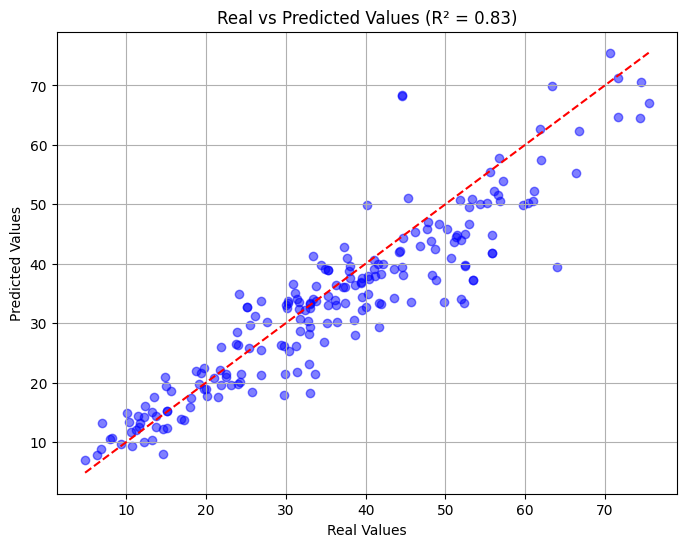

In [15]:
#real vs predicted values graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Real vs Predicted Values (R² = {r2:.2f})')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

In [16]:
rmse

6.6916411081619085

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 450)            │        29,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       225,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 250)            │        75,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,217 (7.64 MB)

 Trainable params: 667,405 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,334,812 (5.09 MB)

<Axes: >

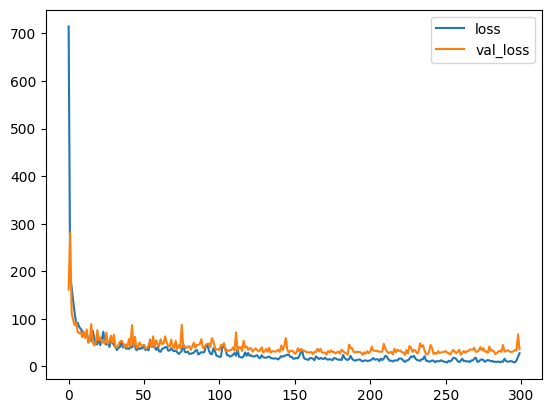

In [18]:
#model loss visualization
loss_f=pd.DataFrame(history.history)
loss_f.plot()

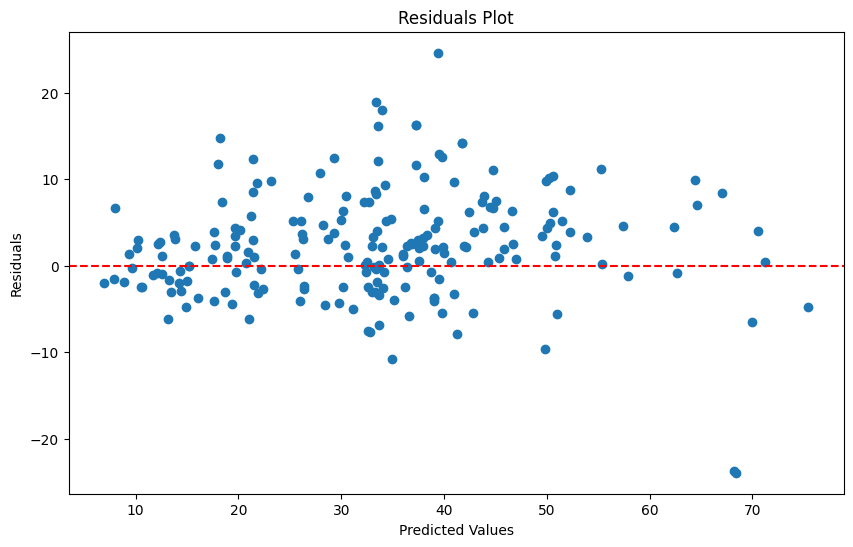

In [19]:
#residuals vs. predicted values
residuals = y_test - pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Problem 2: Classification

+ Develop a machine learning model that can predict the ConcreteClass for a particular concrete recipe. Take concrete regression data and modify it to be suitable for classification examples.

+ Use at least 7 conventional machine learning algorithms and Deep Learning to predict ConcreteClass. 

In [20]:
def green_classifier(s): #creating new categorical targets
    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"

def strength_classifier(x):
    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"

df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifier)

df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no") #converting Plasticizer to categorical
df.drop("Strength", axis=1, inplace=True) #dropping the original Strength column

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cement         1030 non-null   float64
 1   Slag           1030 non-null   float64
 2   FlyAsh         1030 non-null   float64
 3   Water          1030 non-null   float64
 4   Plasticizer    1030 non-null   object 
 5   CoarseAgg      1030 non-null   float64
 6   FineAgg        1030 non-null   float64
 7   Age            1030 non-null   int64  
 8   Green          1030 non-null   object 
 9   ConcreteClass  1030 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 80.6+ KB


In [22]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,n/a,commercial


### Data Preparation for Classification

In [23]:
x_class = df.drop('ConcreteClass', axis=1)
y_class = df['ConcreteClass']

x_class = pd.get_dummies(df,drop_first=True)

x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

In [24]:
label_encoder = LabelEncoder()
y_train_class_encoded = label_encoder.fit_transform(y_train_class)
y_test_class_encoded = label_encoder.transform(y_test_class)

### Predicting by 7 Conventional Machine Learning Algorithms

In [25]:
models_class = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models_class.items():
    model.fit(x_train_class, y_train_class_encoded)
    score = model.score(x_test_class, y_test_class_encoded)
    print(f"{name} Accuracy: {score}")

Logistic Regression Accuracy: 0.8009708737864077
KNN Accuracy: 0.7330097087378641
Support Vector Classifier Accuracy: 0.6456310679611651
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0
Naive Bayes Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


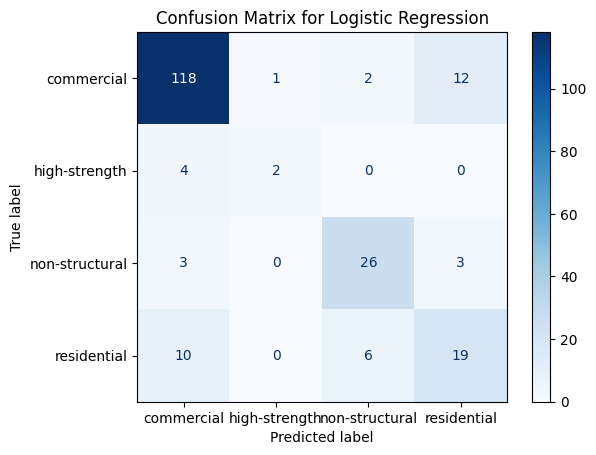

In [26]:
# Predict the test set results and generating the confusion matrix
y_pred_class = models_class['Logistic Regression'].predict(x_test_class)

conf_matrix = confusion_matrix(y_test_class_encoded, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [27]:
#classification report
class_report = classification_report(y_test_class_encoded, y_pred_class, target_names=label_encoder.classes_)
print("Classification Report for Logistic Regression:\n", class_report)

Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    commercial       0.87      0.89      0.88       133
 high-strength       0.67      0.33      0.44         6
non-structural       0.76      0.81      0.79        32
   residential       0.56      0.54      0.55        35

      accuracy                           0.80       206
     macro avg       0.72      0.64      0.67       206
  weighted avg       0.80      0.80      0.80       206



### Deep Learning Classification Model

In [28]:
model_class = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train_class.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_class.unique()), activation='softmax')  # One output per class
])

model_class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model_class.fit(x_train_class, y_train_class_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3300 - loss: 76.3659 - val_accuracy: 0.6545 - val_loss: 14.8873
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4612 - loss: 16.8112 - val_accuracy: 0.5333 - val_loss: 5.9101
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 7.5772 - val_accuracy: 0.6909 - val_loss: 2.7128
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 3.6160 - val_accuracy: 0.5576 - val_loss: 2.4020
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5687 - loss: 2.9843 - val_accuracy: 0.6667 - val_loss: 2.2783
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6216 - loss: 2.1912 - val_accuracy: 0.6303 - val_loss: 1.8609
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6317 - loss: 1.6417 - val_accuracy: 0.7212 - val_loss: 1.3014
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 1.5895 - val_accuracy: 0.6545 

In [29]:
history.model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,758 (61.56 KB)

 Trainable params: 5,252 (20.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,506 (41.04 KB)

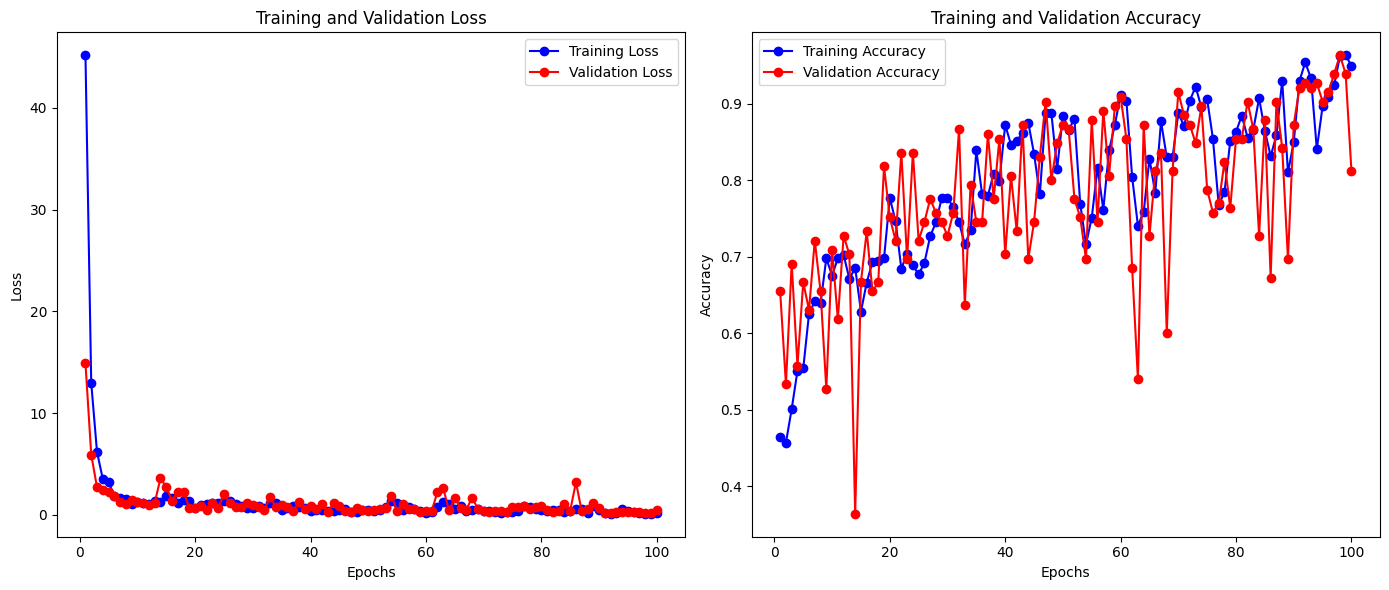

In [33]:
#training and validation loss and accuracy graph
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


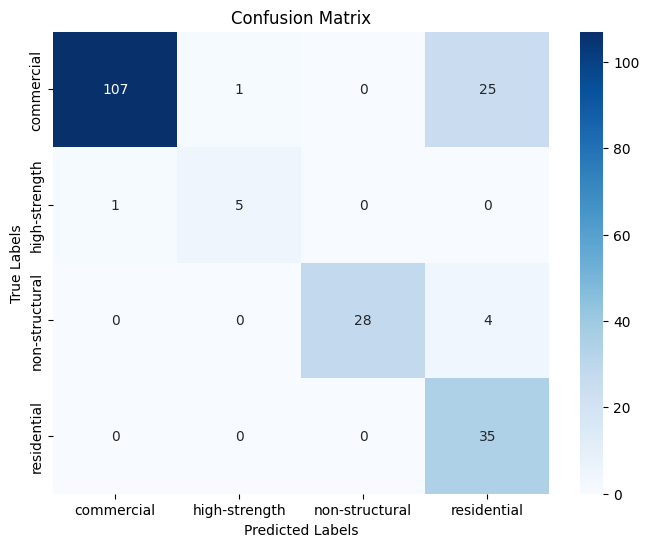

In [34]:
y_pred_class = model_class.predict(x_test_class) #predicting the test set results for confusion matrix
y_pred_class_labels = np.argmax(y_pred_class, axis=1)

conf_matrix = confusion_matrix(y_test_class_encoded, y_pred_class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Results and Evaluation

### Regression - Predicting Concrete Compressive Strength

+ We trained and evaluated multiple conventional machine learning algorithms along with a deep learning model to predict Concrete Compressive Strength. The performance of each model was assessed using the R² score, which indicates how well the model's predictions matched the actual data.
+ The **Random Forest Regressor** and **Gradient Boosting Regressor** demonstrated superior performance with high R² scores, indicating strong predictive accuracy. The deep learning model (ANN) also showed competitive performance, highlighting the potential of neural networks in capturing complex relationships within the data.

### Classification - Predicting ConcreteClass

+ We trained and evaluated multiple conventional machine learning algorithms and a deep learning model to classify concrete into various categories based on its compressive strength. The performance was assessed using accuracy, precision, recall, and F1-score to get a comprehensive understanding of each model's classification capability.

+ Only the **Logistic Regression** achieved high accuracy, showing robustness in distinguishing between different concrete classes. ANN also performed exceptionally well, demonstrating the ability to handle complex classification tasks.
---
- **Model Comparison:** By using a variety of algorithms, we were able to compare and contrast their performance, identifying the most suitable models for both regression and classification tasks.
- **Deep Learning Models:** The use of ANN models for both regression and classification showcased their potential in handling complex, non-linear relationships within the data.
- **Practical Implications:** These models can be instrumental in predicting concrete compressive strength and classifying concrete types, aiding civil engineers in making informed decisions regarding concrete recipes and usage.